In [1]:
from sys import stdout

import numpy as np
from numpy.polynomial.polynomial import Polynomial, polyfit, polyval
import sympy as sp
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as _A  # imported for "side effects"
from IPython.display import display

import heisenberg

## The parameters: Generating set and n

In [49]:
S = [
    # Don't include 0 because it should give the same answer as counting all those 
    # np.array(( 0,  0,  0)),
    np.array(( 1,  0,  0)),
    np.array(( 0,  1,  0)),
    np.array(( 0,  0,  1)),
    np.array((-1,  0,  0)),
    np.array(( 0, -1,  0)),
    np.array(( 0,  0, -1)),
]

In [50]:
n = 9

In [51]:
print("Computing Heisenberg sums on S = {}...".format(S))
p_n = list(heisenberg.compute_h3_pn_spheres(S, n))

Computing Heisenberg sums on S = [array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]), array([-1,  0,  0]), array([ 0, -1,  0]), array([ 0,  0, -1])]...


<IPython.core.display.Javascript object>


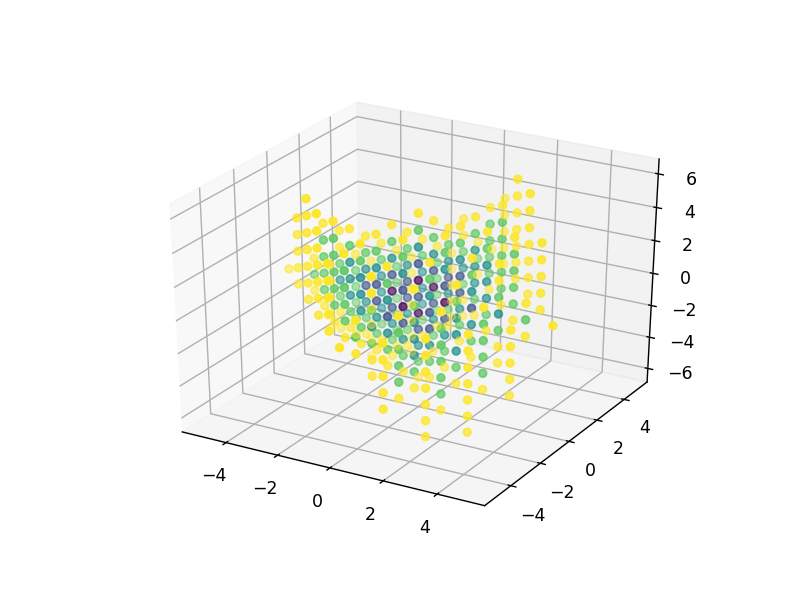

showing h3


E:\prog\Miniconda3\envs\heis\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  


In [15]:
%matplotlib notebook
plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
fig = plt.figure()
print("showing h3")
plotted_h3.plotme(fig)
plt.show()

## Plotting to file for the poster (spring 2020)

In [59]:
n = 9
print("Computing Heisenberg sums on S = {}...".format(S))
p_n = list(heisenberg.compute_h3_pn_spheres(S, n))

Computing Heisenberg sums on S = [array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]), array([-1,  0,  0]), array([ 0, -1,  0]), array([ 0,  0, -1])]...


<IPython.core.display.Javascript object>


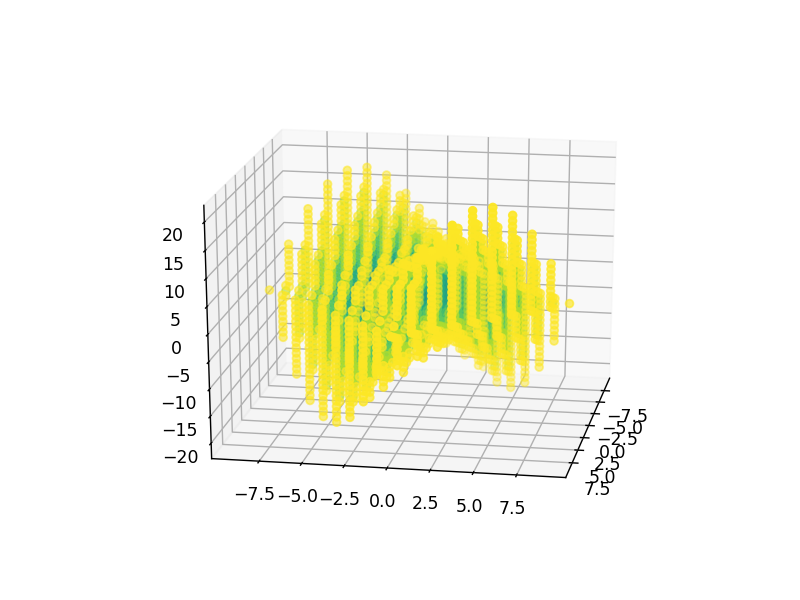

showing h3


In [60]:
filename = '.\octrahedron_neq{}_{}.png'.format(n, '2020-04-16')
azim = 10
elev = 20


plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
fig = plt.figure()
print("showing h3")
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=azim, elev=elev)
ax.scatter(
    plotted_h3.xs, plotted_h3.ys, plotted_h3.zs,
    c=plotted_h3.colors
)
fig.savefig(filename)

# Fitting a polynomial to the number of points
We'll generate, say, 8 numbers-of-points and then pick 5 (the first 5?) to fit it to, then test on the remaining numbers. To be sure.

In [5]:
P_k_sizes = [
    (
        k,
        len(
            set(
                tuple(point) for (point, i) in p_n if i <= k
            )
        )
    )
    for k in range(1, n+1)
]
P_k_sizes

[(1, 6),
 (2, 29),
 (3, 83),
 (4, 189),
 (5, 379),
 (6, 697),
 (7, 1199),
 (8, 1953),
 (9, 3039)]

In [6]:
# Now let's fit a polynomial to it
POLYNOMIAL_DEGREE = 4
fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef[::-1]

array([ 0.45833333, -1.08333333, 10.54166667, -7.91666667,  4.        ])

In [7]:
cs = [sp.Rational(c).limit_denominator(10000000) for c in p.convert().coef[::-1]]
for c in cs:
    display(c)

11/24

-13/12

253/24

-95/12

4

In [8]:
def rectified_p(k: int) -> int:
    return (11*k**4 - 26*k**3 + 253*k**2 - 190*k + 96)//24

def dumb_p(k: int) -> int:
    return int(polyval(k, p.convert().coef))

def dumber_p(k: int) -> int:
    c = p.convert().coef.copy()
    print(c)
    c[-1] = 0
    c[-2] = 0
    print(c)
    return int(polyval(k, c))

In [9]:
# Testing...
evaller = dumb_p

for i in range(POLYNOMIAL_DEGREE + 1, n):
    k, size = P_k_sizes[i]
    predicted_size = evaller(k)
    if predicted_size != size:
        print(f"Polynomial was wrong for k = {k}! Bad! Expected {size}, got {predicted_size}!")
    else:
        print(f"({k}, size = {predicted_size} = {size})")

Polynomial was wrong for k = 6! Bad! Expected 697, got 696!
Polynomial was wrong for k = 7! Bad! Expected 1199, got 1194!
Polynomial was wrong for k = 8! Bad! Expected 1953, got 1938!
Polynomial was wrong for k = 9! Bad! Expected 3039, got 3004!


Hm, it doesn't fit, that's concerning. And it's not a rounding error, because I used the fitted polynomial directly. I didn't substitute rational coefficients. It's also off by more than one in three out of the four cases where it's wrong (testing with n = 9).

So it's not counted by a degree 4 polynomial.

Let's try degree 7.

In [148]:
# Now let's fit a polynomial to it
POLYNOMIAL_DEGREE = 7
fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef[::-1]

array([ 1.98412698e-04, -6.94444444e-03,  1.01388889e-01, -2.98611111e-01,
        1.98888889e+00,  3.80555556e+00, -5.90476191e-01,  1.00000000e+00])

In [150]:
# Testing...
evaller = dumb_p

for i in range(POLYNOMIAL_DEGREE + 1, n):
    k, size = P_k_sizes[i]
    predicted_size = evaller(k)
    if predicted_size != size:
        print(f"Polynomial was wrong for k = {k}! Bad! Expected {size}, got {predicted_size}!")
    else:
        print(f"({k}, size = {predicted_size} = {size})")

(9, size = 3039 = 3039)


Oh no... it sure looks like this is naturally a degree 7 polynomial. Wish I had more datapoints to test that theory.

In [151]:
# cs = [sp.simplify(str(c), rational=True) for c in p.convert().coef[::-1]]
cs = [sp.Rational(c).limit_denominator(10000000) for c in p.convert().coef[::-1]]
for c in cs:
    display(c)

1/5040

-1/144

73/720

-43/144

179/90

137/36

-62/105

1

In [152]:
def rectified_p2(k: int) -> int:
    return (k**7 - 35*k**6 + 511*k**5 - 1505*k**4 + 10024*k**3 + 19180*k**2 - 2976*k + 5040)//5040

In [153]:
# Testing...
evaller = rectified_p2

for i in range(POLYNOMIAL_DEGREE + 1, n):
    k, size = P_k_sizes[i]
    predicted_size = evaller(k)
    if predicted_size != size:
        print(f"Polynomial was wrong for k = {k}! Bad! Expected {size}, got {predicted_size}!")
    else:
        print(f"({k}, size = {predicted_size} = {size})")

Polynomial was wrong for k = 9! Bad! Expected 3039, got 3040!


Oh gosh is this an even more gnarly polynomial? Is it degree 8 or 9? Is it even polynomial??? Is it a polynomial that's just really really gross the way the unsimplified version is?

Because without more datapoints to check it against and show it's eventually wrong, as far as I know it *could* just be a really nasty degree 7 polynomial. But I suspect that it's not polynomial.

Can we fit a rational function to it? That sounds hard. What if we fix the degree of the numerator and of the denominator to be fit? The problem is I'm not sure what degree to guess that it is. 4 and 3 seems like a reasonable conservative guess to try, but that requires $5 + 4 = 9$ datapoints to fit, I'd think, and that leaves me with none to test it on. Getting further datapoints would be gross. I could try 4 and 1 -- then I'd still have 2 datapoints left over to test it on, I think. $5 + 2 = 7$, $9 - 7 = 2$.

# Experiment: Using "quadrants"

```
Quadrant 1:  1  0  0;  0  1  0;  0  0  1
Quadrant 2: -1  0  0;  0 -1  0;  0  0  1
Quadrant 3:  1  0  0;  0 -1  0;  0  0 -1
Quadrant 4: -1  0  0;  0  1  0;  0  0 -1
```

$$
\begin{align*}
    S_1 &= \{(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1)\} \\
    S_2 &= \{(0, 0, 0), (-1, 0, 0), (0, -1, 0), (0, 0, 1)\} \\
    S_3 &= \{(0, 0, 0), (1, 0, 0), (0, -1, 0), (0, 0, -1)\} \\
    S_4 &= \{(0, 0, 0), (-1, 0, 0), (0, 1, 0), (0, 0, -1)\}
\end{align*}
$$

In [30]:
S1 = [
    # Don't include 0 because it should give the same answer as counting all those 
    # np.array(( 0,  0,  0)),
    np.array(( 1,  0,  0)),
    np.array(( 0,  1,  0)),
    np.array(( 0,  0,  1)),
    np.array(( 0,  0, -1)),
]

S2 = [
    # Don't include 0 because it should give the same answer as counting all those 
    # np.array(( 0,  0,  0)),
    np.array((-1,  0,  0)),
    np.array(( 0, -1,  0)),
    np.array(( 0,  0,  1)),
    np.array(( 0,  0, -1)),
]

S3 = [
    # Don't include 0 because it should give the same answer as counting all those 
    # np.array(( 0,  0,  0)),
    np.array(( 1,  0,  0)),
    np.array(( 0, -1,  0)),
    np.array(( 0,  0, -1)),
    np.array(( 0,  0, -1)),
]

S4 = [
    # Don't include 0 because it should give the same answer as counting all those 
    # np.array(( 0,  0,  0)),
    np.array((-1,  0,  0)),
    np.array(( 0,  1,  0)),
    np.array(( 0,  0, -1)),
    np.array(( 0,  0, -1)),
]

n = 8

In [23]:
print("Computing Heisenberg sums on quadrant sets...")
p_S1_n = list(heisenberg.compute_h3_pn_spheres(S1, n))
p_S2_n = list(heisenberg.compute_h3_pn_spheres(S2, n))
p_S3_n = list(heisenberg.compute_h3_pn_spheres(S3, n))
p_S4_n = list(heisenberg.compute_h3_pn_spheres(S4, n))
p_Sis_n = (p_S1_n, p_S2_n, p_S3_n, p_S4_n)

Computing Heisenberg sums on quadrant sets...


Plotting quadrant things...


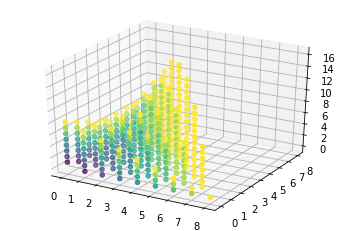

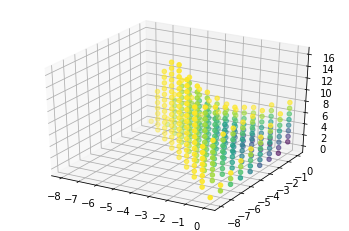

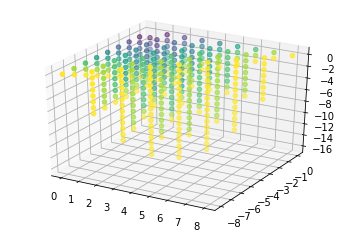

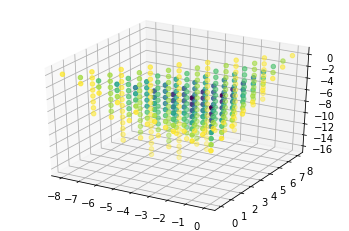

In [24]:
print("Plotting quadrant things...")
for p_Si_n in p_Sis_n:
    plotted_h3 = heisenberg.PlotForm.from_spheres(p_Si_n)
    fig = plt.figure()
    plotted_h3.plotme(fig)
    plt.show()

In [25]:
p_Si_k_sizes = tuple(
    [(k, len(set(tuple(point) for (point, i) in p_Si_n if i <= k)))
     for k in range(1, n+1)]
    for p_Si_n in p_Sis_n)
p_Si_k_sizes

([(1, 3), (2, 10), (3, 24), (4, 49), (5, 90), (6, 153), (7, 245), (8, 374)],
 [(1, 3), (2, 10), (3, 24), (4, 49), (5, 90), (6, 153), (7, 245), (8, 374)],
 [(1, 3), (2, 10), (3, 24), (4, 49), (5, 90), (6, 153), (7, 245), (8, 374)],
 [(1, 3), (2, 10), (3, 24), (4, 49), (5, 90), (6, 153), (7, 245), (8, 374)])

Hm, looks like the sets all grow the exact same ways.

In [26]:
# Now let's fit a polynomial to it
POLYNOMIAL_DEGREE = 4
fit_inputs = [k for (k, _) in p_Si_k_sizes[0][0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in p_Si_k_sizes[0][0:POLYNOMIAL_DEGREE+1]]

pol = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
pol.convert().coef[::-1]

array([ 4.16666667e-02,  2.50000000e-01,  9.58333333e-01,  1.75000000e+00,
       -8.17124146e-14])

In [27]:
cs = [sp.Rational(c).limit_denominator(10000000) for c in pol.convert().coef[::-1]]
for c in cs:
    display(c)

1/24

1/4

23/24

7/4

0

In [28]:
def rectified_p(k: int) -> int:
    return (k**4 + 6*k**3 + 23*k**2 + 42*k + 0)//24

def dumb_p(k: int) -> int:
    return int(polyval(k, pol.convert().coef))

def dumber_p(k: int) -> int:
    c = p.convert().coef.copy()
    print(c)
    c[-1] = 0
    c[-2] = 0
    print(c)
    return int(polyval(k, c))

In [29]:
# Testing...
evaller = dumb_p

for i in range(POLYNOMIAL_DEGREE + 1, n):
    k, size = p_Si_k_sizes[0][i]
    predicted_size = evaller(k)
    if predicted_size != size:
        print(f"Polynomial was wrong for k = {k}! Bad! Expected {size}, got {predicted_size}!")
    else:
        print(f"({k}, size = {predicted_size} = {size})")

(6, size = 153 = 153)
(7, size = 245 = 245)
(8, size = 374 = 374)


**Note:** The sizes above are all too small by one because I don't add the zero sphere (containing only zero) in the computation code. Thus the actual counting polynomial has a constant term of 1. But that makes it identical to the tetrahedron counting polynomial and all of the counting functions should be identical to each other, so that works out nicely. But -- we clearly have cross-terms, because the octahedron isn't counted by four times that polynomial.

For reference, the counting polynomial for the tetrahedron (and for each quadrant tested above) is

$$
p(n) = \frac{1}{4!}n^4 + \frac{1}{4}n^3 + \frac{23}{24}n^2 + \frac{7}{4}n + 1 = |P_n(S)| = |P_n(S_i)|
$$

**Semi-related note:** Why things are bad in the octahedron:

Say we have some integer $y$, then $(-1, 0, 0)(0, y, 0)(1, 0, 0) = (0, y, -y)$.

If $y > 2$, then $(0, y, 0)(0, 0, -2) = (0, y, -2)$ has a higher (less negative) z-coordinate than $(0, y, -y)$.

# The half-octahedron

In [46]:
S = [
    # Don't include 0 because it should give the same answer as counting all those 
    np.array(( 1,  0,  0)),  #  x
    np.array(( 0,  1,  0)),  #  y
    np.array(( 0,  0,  1)),  #  z
    np.array((-1,  0,  0)),  # -x
    np.array(( 0,  0, -1)),  # -z
]

n = 8

In [47]:
print("Computing Heisenberg sums on S = {}...".format(S))
p_n = list(heisenberg.compute_h3_pn_spheres(S, n))

Computing Heisenberg sums on S = [array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]), array([-1,  0,  0]), array([ 0,  0, -1])]...


In [ ]:
%matplotlib notebook

plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
fig = plt.figure()
print("showing h3")
plotted_h3.plotme(fig)
plt.show()

## Plotting to file for the poster (spring 2020)

n = 8
print("Computing Heisenberg sums on S = {}...".format(S))
p_n = list(heisenberg.compute_h3_pn_spheres(S, n))

<IPython.core.display.Javascript object>


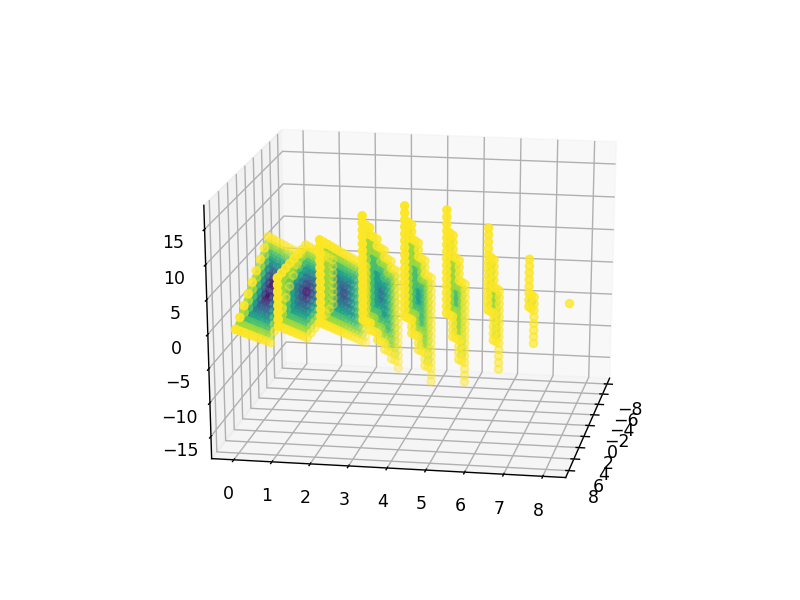

showing h3


In [48]:
filename = '.\halfoctrahedron_neq{}_{}.png'.format(n, '2020-04-16')
azim = 10
elev = 20


plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
fig = plt.figure()
print("showing h3")
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=azim, elev=elev)
ax.scatter(
    plotted_h3.xs, plotted_h3.ys, plotted_h3.zs,
    c=plotted_h3.colors
)
fig.savefig(filename)

## Experiment: Is this the right floor function?

I think I found the floor function for the half-octahedron

$$S = {0, x, y, z, -x, -z}.$$

I think it should be

$$
f(a, b) = \left\{\begin{align*}
    b\left(\min(a, 0) - \left\lfloor \frac{n - \left|a\right| - b}{2}\right\rfloor\right) - \left(\left(n - \left|a\right| - b\right) \mathrm{mod}\ 2\right) & \ \mathrm{for}\ b \geq 2 \\
    b \min(a, 0) - (n - |a| - b) & \ \mathrm{for}\ b \lt 2
\end{align*}\right\}
$$

showing floor


<IPython.core.display.Javascript object>


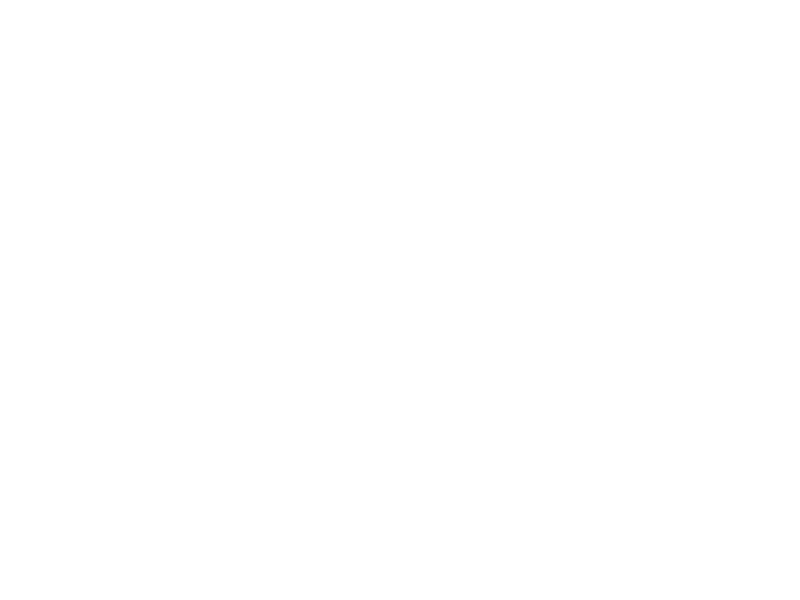

In [5]:
%matplotlib notebook

# Compute the floor
xs, ys = np.mgrid[-n:n+1:1, 0:n+1:1]
in_region = (np.abs(xs) + np.abs(ys)) <= n
xs, ys = xs[in_region], ys[in_region]

slack = n - np.abs(xs) - ys

# complete ver
zs = -ys*(-np.minimum(xs, 0) + (ys >= 2)*(slack // 2)) - (ys >= 2)*(slack % 2) - (ys < 2)*(slack)

# Show it
print("showing floor")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='r')
fig.show()

<IPython.core.display.Javascript object>


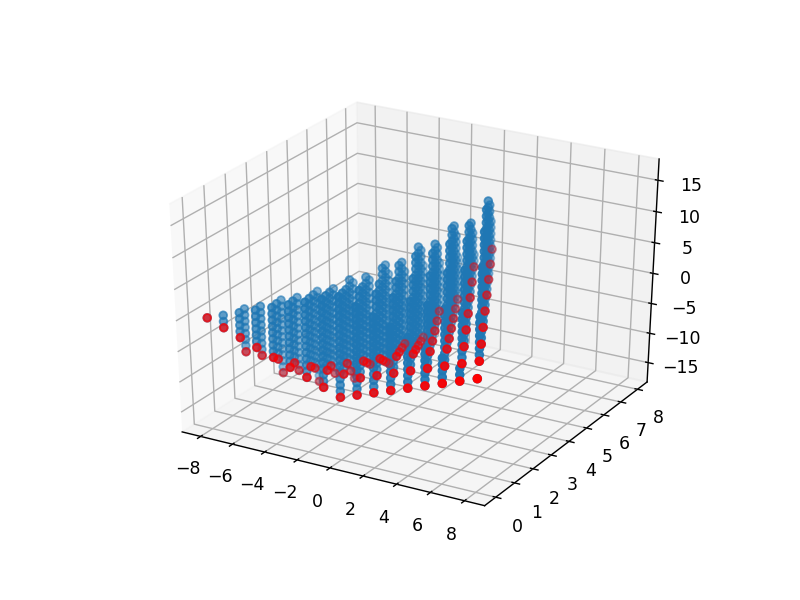

In [23]:
%matplotlib notebook

plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
p_n_xs, p_n_ys, p_n_zs = np.array(plotted_h3.xs), np.array(plotted_h3.ys), np.array(plotted_h3.zs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_n_xs, p_n_ys, p_n_zs)
ax.scatter(xs, ys, zs, color='#FF0000FF')

fig.show()

In [24]:
# point_array = np.array([point for point, _min_word_length in p_n])
# p_n_xs, p_n_ys, p_n_zs = point_array[:, 0], point_array[:, 1], point_array[:, 2]

for p_n_x, p_n_y, p_n_z in point_array: # zip(p_n_xs, p_n_ys, p_n_zs):
    for x, y, z in zip(xs, ys, zs):
        if (x <= 0) and (x == p_n_x) and (y == p_n_y) and (p_n_z < z):
            print("oh no, failed at x = {}, y = {}, z = {}, predicted floor = {}".format(x, y, p_n_z, z))

# Experiment: hey these y-slices sure look polygonal

These slices parallel to the xz plane look polygonal, which is weird. Why do they look that way? Let's experiment. First, a demonstrating visualization.

In [56]:
# function for yz slices
%matplotlib notebook

def plot_yz_slice(y_const):
    # strictly speaking shouldn't be in here but idc
    
    plotted_h3 = heisenberg.PlotForm.from_spheres(p_n)
    p_n_xs, p_n_ys, p_n_zs = np.array(plotted_h3.xs), np.array(plotted_h3.ys), np.array(plotted_h3.zs)
    y_in_slice = (np.array(p_n_ys) == y_const)

    p_n_xs, p_n_ys, p_n_zs = p_n_xs[y_in_slice], p_n_ys[y_in_slice], p_n_zs[y_in_slice]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(p_n_xs, p_n_ys, p_n_zs, color='#006300')

    # Plot the floor boundary
    ax.plot(
        (y_const - n, n - y_const),
        (y_const, y_const),
        (
            # slack here is n - |a| - b = n - (n - y_const) - b = y_const - b = y_const - y_const = 0.
            #
            # the expression from before simplifies A LOT.
            y_const*(y_const - n),
            0
        ),
        color='r'
    )

    # Plot the ceiling boundary
    #
    # NOTE: I haven't actually worked out what the ceiling is (as of 2020-04-06 at 14:35),
    # but from these slices it sure looks like it should be almost identical to the floor
    # function. That also makes sense based on the analysis of how to get you to the floor.
    # You should be able to essentially just reverse the positions of (-x) and x in the
    # "canonical" letter order for the floor points to get the "canonical" order for the
    # ceiling points.
    ax.plot(
        (y_const - n, n - y_const),
        (y_const, y_const),
        (
            # slack here is n - |a| - b = n - (n - y_const) - b = y_const - b = y_const - y_const = 0.
            #
            # the expression from before simplifies A LOT.
            0,
            y_const*(n - y_const)
        ),
        color='#2700ff'
    )

    ax.set_title("xz-parallel slice, y = {}".format(y_const))

    fig.show()

<IPython.core.display.Javascript object>


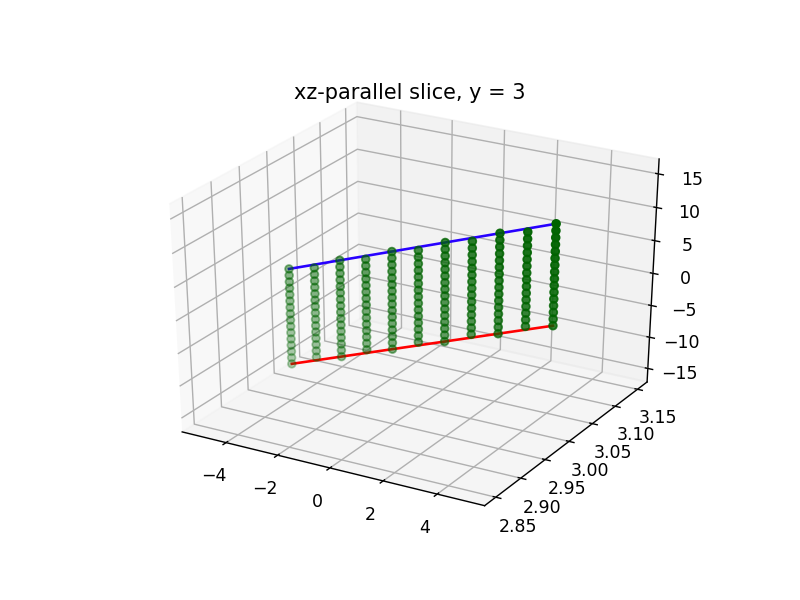

In [60]:
plot_yz_slice(y_const=3)

This looks pretty convincing. What about later slices?

I looked at later slices and $y = 7$ is one where this both clearly holds as a bound and clearly isn't tight.

<IPython.core.display.Javascript object>


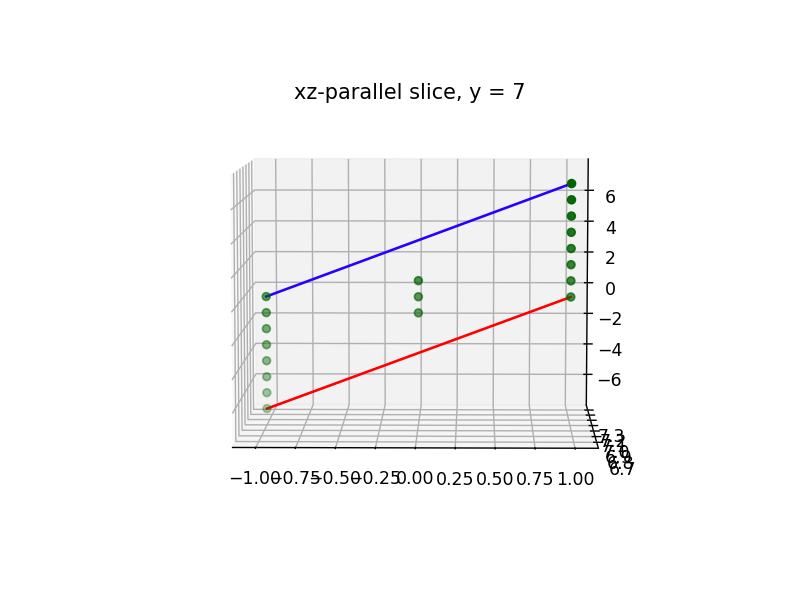

In [59]:
plot_yz_slice(y_const=7)

It also does't seem to hold in the $y = 6$ slice. However, interestingly, in this slice it doesn't hold for the odd x-values rather than for the even x-values. (In $y = 5$ the bounds aren't tight for the even-numbered x-values.)

<IPython.core.display.Javascript object>


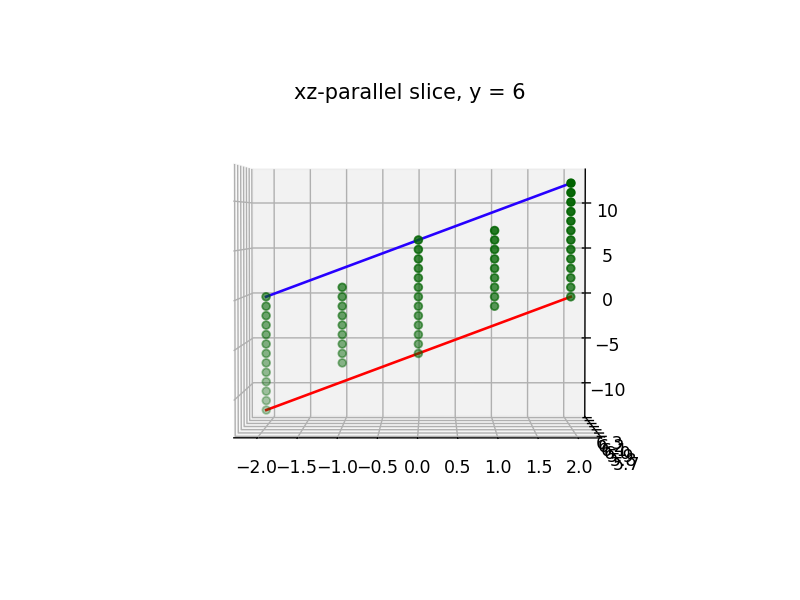

In [61]:
plot_yz_slice(y_const=6)

I have a hypothesis for why it looks this way... for $y \geq 2$, I have that conjecture about the form of words that end up on the floor. This give us the floor function. By extension, I have a conjecture about what the ceiling form and ceiling function look like. (The ceiling should be almost the same form but with the $(-x)$ and $x$ letters reversed, such that the ceiling goes up exactly as high as the floor goes down but in the opposite places.)

In even $y$ slices, the odd $x$ values have slack ($n - |x| - y$) that's odd.

In odd $y$ slices, the even $x$ values have slack that's odd.

When the slack value is odd, we get this $\pm1$ term in the $z$ coordinate in the floor function and probably also in the celing function. But that's a "consolation prize" because we don't have enough slack to add both a $(-x)$ and an $x$ and get some more multiplicative terms in our $z$ coordinate. This difference becomes more and more pronounced the further out we go in the $y$ direction because the multiplicative terms multiply by $y$, so the difference keeps getting bigger and bigger. That's why you can barely see it's not quite linear in $y = 3$ but by $y = 7$ it's painfully obvious.

Why does it look linear? For $y = 2$ it should be exactly linear, because going up and down using two of $-z$ or $z$ is exactly as good as using a pair of $x$ and $-x$ for changing your $z$ coordinate. As we go out though the pairs of $x$ and $-x$ get better and better for changing the $z$ coordinate.

What I'm somewhat confused about is... we have this $max(-x, 0) = -min(x, 0)$ term in there that seems like it should make things piecewise linear, especially because the quotient term... I mean the floor formula for $y \geq 2$ looks like this:

$$
\begin{align*}
  & y \left(\min(x, 0) - \left\lfloor \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(-\max(-x, 0) + \left\lfloor \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right)
\end{align*}
$$

This sure doesn't look like it should be linear in $x$, but maybe it is because we have the $-max(-x, 0)$ term in there as well as the absolute value term? It would be nice if we could combine those somehow to make this almost-linearity clearer...

In fact, maybe we can. Moving the integer value inside the floor function shouldn't change the value of the parenthesized expression, so let's try doing that. Then we can manipulate it to put the terms together.

$$
\begin{align*}
  & -y \left(-\max(-x, 0) + \left\lfloor \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor -\max(-x, 0) + \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{-2\max(-x, 0)}{2} + \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - 2\max(-x, 0) - \left|x\right| - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - (2\max(-x, 0) + \max(-x, x)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right)
\end{align*}
$$

This inner expression $2 \max(-x, 0) + \max(-x, x)$ looks like it could be simplified further but I'm not sure how to do that. I'm sure there's some clever way to do it though. Some rule for manipulating finite maximum things, maybe.

I dunno. I plotted this function in Desmos and it doesn't look linear, so maybe I went wrong in simplifying things? I notice that it DOES look linear if I change it to $-2 \max(-x, 0) + \max(-x, x)$. In fact it looks like the identitity function.

The specific way it's not linear and the way it's linear when you change it gives me more hope that there's a way to simplify this with some corrections to the above calculations.

... Ah, I see, it was a sign error. Yes, the max should have been positive.

$$
\begin{align*}
  & -y \left(\max(-x, 0) + \left\lfloor \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \max(-x, 0) + \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{2\max(-x, 0)}{2} + \frac{n - \left|x\right| - y}{2}\right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n + 2\max(-x, 0) - \left|x\right| - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - (-2\max(-x, 0) + \max(-x, x)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - (2\min(x, 0) + \max(-x, x)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right)
\end{align*}
$$

It makes perfect sense that this would be linear, but I'm not sure how to show it is using min/max identities etc.

[Here is the Desmos graph][desmos_graph_linear].

[desmos_graph_linear]: https://www.desmos.com/calculator/6ztfcgx9zs

Aha, duh, I see. $\max(-x, x) = \max(-x, 0) + \max(x, 0)$. So

$$
\begin{align*}
  & -y \left(\left\lfloor \frac{n - (-2\max(-x, 0) + \max(-x, x)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - (-2\max(-x, 0) + \max(-x, 0) + \max(x, 0)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - (-\max(-x, 0) + \max(x, 0)) - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
= & -y \left(\left\lfloor \frac{n - x - y}{2} \right\rfloor\right) - \left(\left(n - \left|x\right| - y\right) \mathrm{mod}\ 2\right) \\
\end{align*}
$$

(Incidentally, it looks like in general maybe $x + c = \min(x, c) + \max(x, c) = -\max(-x, -c) + \max(x, c)$?)